In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt


In [2]:
df_main = pd.read_csv("my-data-set-cleared.csv")
df_copy = df_main.copy()

df_numeric = df_copy.select_dtypes(include='number')


df_copy = df_copy.drop(columns=['Unnamed: 0','Unnamed: 0.1'])
df_numeric = df_numeric.drop(columns=['Unnamed: 0','Unnamed: 0.1'])

In [3]:
df_numeric.head()

,win_round,win time,winner age,loser age,winner_wins,winner loses,loser wins,loser loses,winner height,loser height,winner reach,loser reach,winner leg reach,loser leg reach,method category,weight class category
0,5.0,300,30.0,40.0,12,2,14,5,68.0,68.0,68.0,69.0,39.5,38.0,0,9
1,3.0,300,28.0,35.0,27,11,28,5,73.0,72.0,73.0,73.0,42.0,40.5,0,8
2,1.0,288,33.0,28.0,21,7,11,2,75.0,73.0,80.0,74.0,45.0,41.0,3,7
3,3.0,300,27.0,29.0,6,1,12,4,61.0,65.0,61.0,67.0,36.0,38.5,0,12
4,3.0,300,29.0,35.0,13,5,14,6,71.0,73.0,72.0,75.0,40.0,43.5,0,7


In [4]:
winners_df = df_copy[["win_round", "win time", "winner age",
                      "winner_wins", "winner loses", "winner height",
                      "winner reach","winner leg reach"]].copy()

losers_df = df_copy[["win_round", "win time", "loser age",
                      "loser wins", "loser loses", "loser height",
                      "loser reach","loser leg reach"]].copy()

winners_df['class'] = 1
losers_df['class'] = 0

#fix columns names
winners_df.rename(columns = {'win_round':'win round', 'winner age':'age',
                             'winner_wins': 'wins', 'winner loses': 'loses',
                             'winner height':'height','winner reach':'reach',
                             'winner leg reach':'leg reach'}, inplace = True)

losers_df.rename(columns = {'win_round':'win round', 'loser age':'age',
                             'loser wins': 'wins', 'loser loses': 'loses',
                             'loser height':'height','loser reach':'reach',
                             'loser leg reach':'leg reach'}, inplace = True)

all_df = pd.concat([winners_df, losers_df])

all_df

,win round,win time,age,wins,loses,height,reach,leg reach,class
0,5.0,300,30.0,12,2,68.0,68.0,39.5,1
1,3.0,300,28.0,27,11,73.0,73.0,42.0,1
2,1.0,288,33.0,21,7,75.0,80.0,45.0,1
3,3.0,300,27.0,6,1,61.0,61.0,36.0,1
4,3.0,300,29.0,13,5,71.0,72.0,40.0,1
...,...,...,...,...,...,...,...,...,...
4867,2.0,96,30.0,0,0,72.0,72.0,40.0,0
4868,2.0,52,30.0,6,4,72.0,72.0,40.0,0
4869,2.0,177,30.0,14,2,72.0,72.0,40.0,0
4870,2.0,43,30.0,4,1,72.0,72.0,40.0,0


In [5]:
#remove outlires

all_df = all_df[(np.abs(stats.zscore(all_df)) <= 3).all(axis=1)]

In [6]:
# preproccesing. split data

X = all_df.iloc[:, :-1].values
y = all_df['class']

In [7]:
#train test split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [8]:
#Training and Predictions

classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [9]:

y_pred = classifier.predict(X_test)

print(y_pred)

[1 1 1 ... 0 1 0]


In [10]:

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[493 447]
 [366 549]]
              precision    recall  f1-score   support

           0       0.57      0.52      0.55       940
           1       0.55      0.60      0.57       915

    accuracy                           0.56      1855
   macro avg       0.56      0.56      0.56      1855
weighted avg       0.56      0.56      0.56      1855



D:\Users\kinsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\kinsh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

LR: 0.582562 (0.026456)
LDA: 0.586102 (0.024786)
KNN-5: 0.566699 (0.024460)
KNN-7: 0.569624 (0.024984)
KNN-9: 0.575323 (0.030762)
CART: 0.618610 (0.015511)
CART-3: 0.647250 (0.017656)
CART-6: 0.651873 (0.016041)
CART-7: 0.651103 (0.018899)
CART-8: 0.651103 (0.018899)
CART-10: 0.647100 (0.019019)
NB: 0.593656 (0.017751)
SVM: 0.527875 (0.021514)


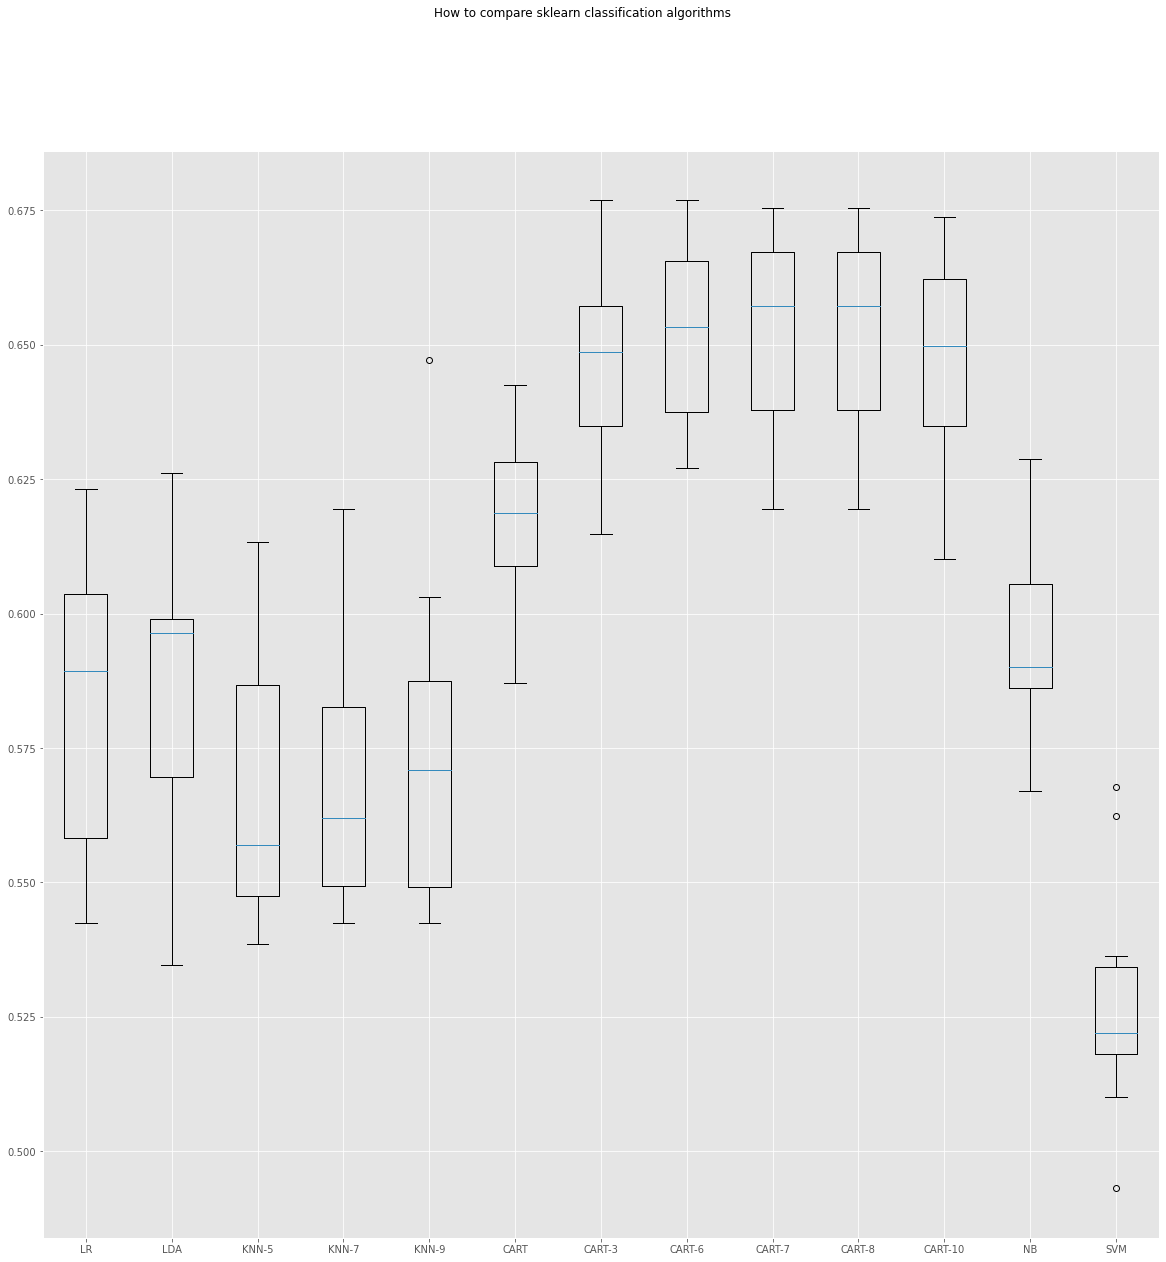

In [11]:


plt.style.use('ggplot')

X = all_df.iloc[:, :-1].values
y = all_df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)
kfold = model_selection.KFold(n_splits=10)



models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))


models.append(('KNN-5', KNeighborsClassifier(n_neighbors=5)))
models.append(('KNN-7', KNeighborsClassifier(n_neighbors=7)))
models.append(('KNN-9', KNeighborsClassifier(n_neighbors=9)))


models.append(('CART', DecisionTreeClassifier()))
models.append(('CART-3', DecisionTreeClassifier(max_leaf_nodes=3)))
models.append(('CART-6', DecisionTreeClassifier(max_leaf_nodes=6)))
models.append(('CART-7', DecisionTreeClassifier(max_leaf_nodes=7)))
models.append(('CART-8', DecisionTreeClassifier(max_leaf_nodes=8)))
models.append(('CART-10', DecisionTreeClassifier(max_leaf_nodes=10)))




models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))



results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
    

    
fig = plt.figure(figsize=(20,20))
fig.suptitle('How to compare sklearn classification algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()